# DATA TALK
## Decision Tree

In [1]:
# Manipulação de dados
import pandas as pd
import numpy as np
# Machine Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection  import train_test_split
from sklearn.metrics import classification_report
# Visualização de Dados
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
%matplotlib inline
# Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importa a base de dados
base = pd.read_csv('database.csv')

In [3]:
# Visualiza base de dados
base

,aspecto,tempo,vento,umidade,fds,jogar_futebol
0,Sol,Quente,Fraco,Normal,1,1
1,Sol,Quente,Forte,Eleveda,1,1
2,Nuvens,Quente,Fraco,Normal,1,1
3,Chuva,Ameno,Fraco,Elevada,0,1
4,Chuva,Quente,Fraco,Elevada,1,101
...,...,...,...,...,...,...
200,Chuva,Frio,Fraco,Normal,1,0
201,Chuva,Frio,Fraco,Eleveda,1,0
202,Chuva,Frio,Fraco,Normal,1,0
203,Chuva,Quente,Forte,Elevada,0,1


In [4]:
# Verifica distribuição da base
base['jogar_futebol'].value_counts(normalize = 'index').round(2)

1        0.65
0        0.33
101      0.00
10000    0.00
10       0.00
8        0.00
5        0.00
Name: jogar_futebol, dtype: float64

In [5]:
# Remove valores distorcidos
base = base[base['jogar_futebol'] <= 1]

In [6]:
# Verifica distribuição da base
base['jogar_futebol'].value_counts(normalize = 'index').round(2)

1    0.66
0    0.34
Name: jogar_futebol, dtype: float64

In [7]:
# Verifica distribuição variável 'umidade'
base['umidade'].value_counts(normalize = 'index').round(2)

Normal     0.48
Elevada    0.34
Eleveda    0.18
Name: umidade, dtype: float64

In [8]:
# Corrige variável de umidade
base['umidade'] = np.where(base['umidade'] == 'Eleveda', 'Elevada', base['umidade'])

In [9]:
# Verifica distribuição variável 'umidade'
base['umidade'].value_counts(normalize = 'index').round(2)

Elevada    0.52
Normal     0.48
Name: umidade, dtype: float64

In [10]:
# Separa variáveis preditoras do target
X = base[['aspecto', 'tempo', 'vento', 'umidade', 'fds']]
y = base[['jogar_futebol']]

In [11]:
# Cria as variáveis dummyes, uma vez que os modelos de ML não aceitam strings.
X = pd.get_dummies(X)

In [12]:
X

,fds,aspecto_Chuva,aspecto_Nuvens,aspecto_Sol,tempo_Ameno,tempo_Frio,tempo_Quente,vento_Forte,vento_Fraco,umidade_Elevada,umidade_Normal
0,1,0,0,1,0,0,1,0,1,0,1
1,1,0,0,1,0,0,1,1,0,1,0
2,1,0,1,0,0,0,1,0,1,0,1
3,0,1,0,0,1,0,0,0,1,1,0
5,1,1,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
200,1,1,0,0,0,1,0,0,1,0,1
201,1,1,0,0,0,1,0,0,1,1,0
202,1,1,0,0,0,1,0,0,1,0,1
203,0,1,0,0,0,0,1,1,0,1,0


In [13]:
# Separa base de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)

In [14]:
# Criação do modelo
modelo_DT = DecisionTreeClassifier(max_depth = 5, random_state = 5)
modelo_DT

DecisionTreeClassifier(max_depth=5, random_state=5)

In [15]:
# Fit do Modelo
modelo_DT = modelo_DT.fit(X_train, y_train)

In [16]:
# Predição do modelo
y_pred = modelo_DT.predict(X_test)

In [17]:
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1], dtype=int64)

In [18]:
print(classification_report(y_test, y_pred, target_names = ['Não Jogar', 'Jogar']))

              precision    recall  f1-score   support

   Não Jogar       0.68      0.88      0.77        17
       Jogar       0.93      0.79      0.85        33

    accuracy                           0.82        50
   macro avg       0.81      0.84      0.81        50
weighted avg       0.84      0.82      0.82        50



- Precision: Verdadeiro Positivo / Verdadeiros Positivos + Falsos Positivos = Daqueles que classifiquei como corretos, quantos efetivamente eram?

- Recall: Verdadeiro Positivo / Verdadeiros Positivos + Falsos Negativo =   Quando realmente é da classe X, o quão frequente classifiquei como X?

- F1: 2 * Precision * Recall / Precision + Recall =  Essa métrica combina Precision e Recall, de modo a trazer um número único que indique a qualidade geral do seu modelo

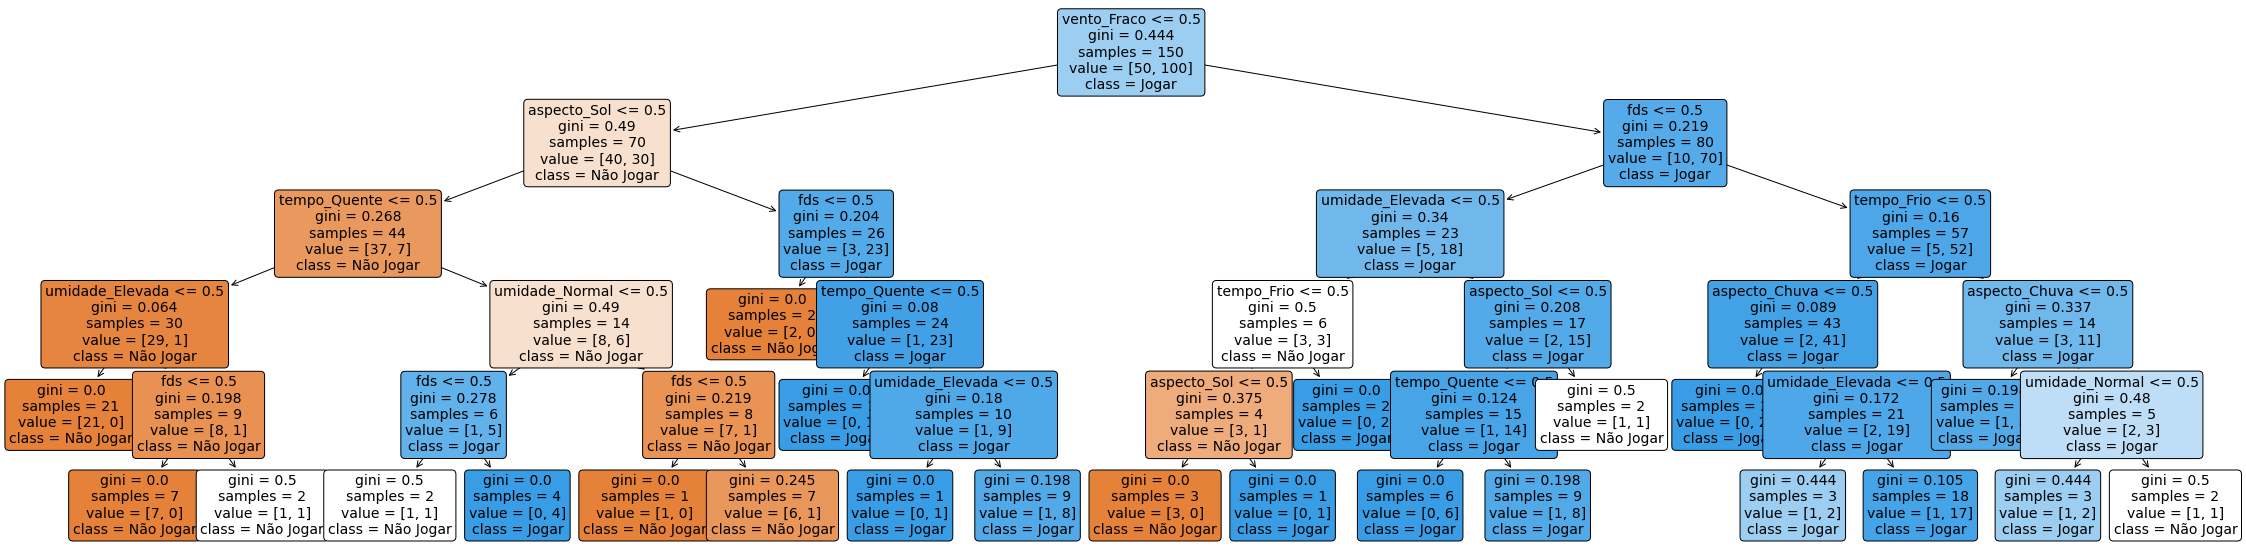

In [19]:
plt.figure(figsize=(40, 10))
a = plot_tree(modelo_DT, 
              feature_names=X.columns, 
              class_names= ['Não Jogar', 'Jogar'], 
              filled=True, 
              rounded=True, 
              fontsize=14)